In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from data.loader import load_and_score
from data.constants import DATA_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Author distribution in Books3

In [68]:
import os

def extract_metadata_from_files(path_to_files):
    with open(path_to_files, 'r') as f:
        files = [x.strip() for x in f.readlines()]
    metadata = []
    for file in files:
        basename = os.path.split(file)[1]

        # drop extensions
        filename = basename[:-9]

        # if filename starts with a year, drop the first token
        year = None
        try:
            year = int(filename[:4])
            if 1800 < year < 2025:
                filename = ' '.join(filename.split()[1:])
        except ValueError:
            pass

        parts = filename.split(' - ')
        parts = [part.strip().encode('ascii', 'ignore').decode('utf-8') for part in parts]
        if len(parts) > 1:
            title = parts[0]
            author = parts[1]
        else:
            title = parts[0]
            author = "Unknown"
        metadata.append({"file": file, "title": title, "author": author})
    return metadata

books3_metadata = extract_metadata_from_files("../books3/metadata/filenames.txt")
books3_metadata = pd.DataFrame(books3_metadata)

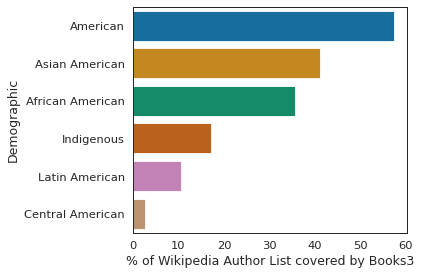

In [70]:
def read_names(infile):
    names = set()
    with open(infile) as f:
        lines = f.readlines()

    for line in lines:
        line = line.split('(')[0]
        line = line.split('[')[0]
        line = line.split(',')[0]
        name = line.strip().encode('ascii', 'ignore').decode('utf-8')
        names.add(name)
    return names

american_novelists = read_names(DATA_DIR / 'notebooks/authors/american_novelists.txt')
african_american_authors = read_names(DATA_DIR / 'notebooks/authors/african_american_authors_wikipedia.txt')
asian_american_authors = read_names(DATA_DIR / 'notebooks/authors/asian_american_authors.txt')
latin_american_authors = read_names(DATA_DIR / 'notebooks/authors/latin_american_authors.txt')
central_american_authors = read_names(DATA_DIR / 'notebooks/authors/central_american_authors.txt')
indigenous_authors = read_names(DATA_DIR / 'notebooks/authors/indigenous_authors.txt')



authors = {'American': list(american_novelists),
           'African American': list(african_american_authors),
           'Asian American': list(asian_american_authors),
           'Latin American': list(latin_american_authors),
           'Central American': list(central_american_authors),
           'Indigenous': list(indigenous_authors),
          'books3': list(books3_metadata.author.unique())}


all_authors = (american_novelists.union(african_american_authors)
                               .union(asian_american_authors)
                               .union(latin_american_authors)
                               .union(central_american_authors)
                               .union(indigenous_authors))

authors = pd.DataFrame.from_dict(authors, orient='index').T


data = []
for column in [x for x in authors.columns if x != 'books3']:
    intersection = len(set(authors[column]) & set(authors.books3))
    total = len(set(authors[column]))
    data.append({'Demographic': column, 'intersection': intersection, 'total': total})
data= pd.DataFrame(data)
data['percent'] = data['intersection']/ data['total'] * 100
import seaborn as sns
sns.set(context='paper', style='white', font_scale=1.3)
sns.set_palette('colorblind')
ax = sns.barplot(data=data,
                 y='Demographic',
                 x='percent',
                 order=['American', 'Asian American', 'African American',
                        'Indigenous', 'Latin American', 'Central American'])
ax.set_xlabel("% of Wikipedia Author List covered by Books3")
plt.tight_layout()
plt.savefig('authors.pdf', dpi=300)


## OWTC distribution

<AxesSubplot:>

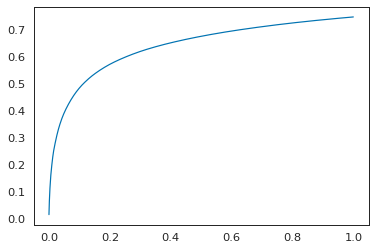

In [89]:
import pandas as pd
urls = pd.read_json("metadata_full_fnames.jsonl", lines=True)
vals = urls.domain.value_counts(normalize=True)
num = int(len(vals) * 0.01)
cumulative_sum = np.cumsum(vals.values[:num])
sns.lineplot(x=[(x / len(vals)) * 100 for x in range(num)], 
             y=cumulative_sum)

In [90]:
cumulative_sum

array([0.01554076, 0.03089495, 0.04273421, ..., 0.74926894, 0.74930062,
       0.74933229])

In [91]:
vals.head(n=10)

bbc.co.uk             0.015541
theguardian.com       0.015354
washingtonpost.com    0.011839
nytimes.com           0.011719
reuters.com           0.010518
huffingtonpost.com    0.009622
cnn.com               0.009334
cbc.ca                0.008947
dailymail.co.uk       0.007751
go.com                0.006365
Name: domain, dtype: float64

In [132]:
urls.domain.value_counts().head(n=10)

bbc.co.uk             116286
theguardian.com       114890
washingtonpost.com     88589
nytimes.com            87692
reuters.com            78706
huffingtonpost.com     71995
cnn.com                69840
cbc.ca                 66949
dailymail.co.uk        58001
go.com                 47627
Name: domain, dtype: int64

## Pulitzer Prizes

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

/tmp/ipykernel_9341/1700142485.py:20: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  m = pd.concat([ff.sample(pp.shape[0]), pp, ppoetry, pnf, pdra], 0)


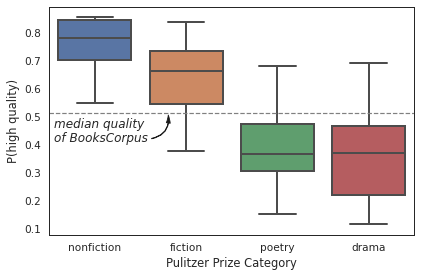

In [9]:

ff = load_and_score("../demix-data/fanfiction.jsonl")
ff['genre'] = 'fan fiction'

pp = load_and_score("../demix-data/pulitzer_prize_fiction.jsonl")

pp['genre'] = 'fiction'

ppoetry = load_and_score("../demix-data/pulitzer_prize_poetry.jsonl")

ppoetry['genre'] = 'poetry'

pnf = load_and_score("../demix-data/pulitzer_prize_nonfiction.jsonl")

pnf['genre'] = 'nonfiction'

pdra = load_and_score("../demix-data/pulitzer_prize_drama.jsonl")

pdra['genre'] = 'drama'

m = pd.concat([ff.sample(pp.shape[0]), pp, ppoetry, pnf, pdra], 0)

sns.set(style='white',font_scale=1.2,context='paper')
ax = sns.boxplot(data=m, x='genre', y='prob_high_quality', linewidth=2, order=['nonfiction', 'fiction', 'poetry', 'drama'])
plt.axhline(y=ff.prob_high_quality.median(), color='gray', linestyle='--')
plt.text(-0.45, 0.46, "median quality", fontsize=12,fontstyle='italic')
plt.text(-0.45, 0.41, "of BooksCorpus", fontsize=12,fontstyle='italic')


from matplotlib import patches
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
a1 = patches.FancyArrowPatch((0.6, 0.42), (0.8, ff.prob_high_quality.median()),
                        connectionstyle="arc3,rad=.5", **kw)

for a in [a1]:
    plt.gca().add_patch(a)
    
ax.set_ylabel("P(high quality)")
ax.set_xlabel("Pulitzer Prize Category")
plt.tight_layout()
# plt.savefig("pulitzer_prize.pdf", dpi=300, bbox_inches='tight')


## High and low factuality news

In [13]:
high_news = load_and_score(path=DATA_DIR / "articles-high-reliability-clean.jsonl")
low_news = load_and_score(path=DATA_DIR / "articles-low-reliability-clean.jsonl")

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/7662 [00:00<?, ?it/s]

  0%|          | 0/7662 [00:00<?, ?it/s]

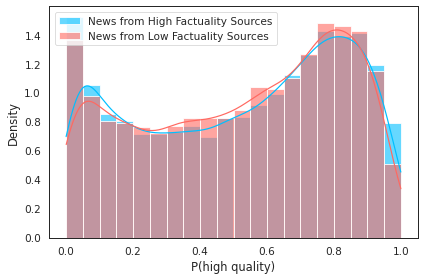

In [34]:
sns.histplot(high_news.prob_high_quality, label='News from High Factuality Sources', kde=True, stat='density', color='#00bfff', alpha=0.6)

ax = sns.histplot(low_news.prob_high_quality, label='News from Low Factuality Sources', kde=True, stat='density', color='#ff6961', alpha=0.6)
plt.legend()
ax.set_xlabel("P(high quality)")
plt.tight_layout()
plt.savefig("high_low_news.pdf", dpi=300, bbox_inches='tight')


In [21]:
from scipy import stats
stats.ks_2samp(high_news.prob_high_quality, low_news.prob_high_quality)

KstestResult(statistic=0.01902919476780168, pvalue=0.08570356907975685)